Imports

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Migration

Defining

In [65]:
# Initialize a grid of species with random fitness values
def initialize_grid(grid_size):
    # grid = np.random.rand(grid_size, grid_size)
    grid = np.empty((grid_size, grid_size), dtype=object)
    return grid

# Find the Moore neighbors of a particle at position (i, j) in the grid
def find_neighbours(i, j, grid_size):
    neighbours = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            new_i = (i + dx) % grid_size
            new_j = (j + dy) % grid_size
            neighbours.append((new_i, new_j))
    return neighbours

# Perform species migration based on the fitness level
def migrate_species(grid):
    grid_copy = grid.copy()
    grid_size = grid.shape[0]
    for i in range(grid_size):
        for j in range(grid_size):
            particle = grid_copy[i, j]
            if particle is None:
                continue
            current_fitness = particle['fitness']
            neighbours = find_neighbours(i, j, grid_size)
            best_fitness = current_fitness
            best_neighbour = None
            for neighbour in neighbours:
                neighbour_i, neighbour_j = neighbour
                neighbour_particle = grid_copy[neighbour_i, neighbour_j]
                if neighbour_particle is None:
                    continue
                neighbour_fitness = neighbour_particle['fitness']
                if neighbour_fitness > best_fitness:
                    best_fitness = neighbour_fitness
                    best_neighbour = neighbour
            if best_neighbour is not None:
                neighbour_i, neighbour_j = best_neighbour
                grid[neighbour_i, neighbour_j] = grid_copy[i, j]
                grid_copy[i, j] = None
    return grid


Running Mirgration

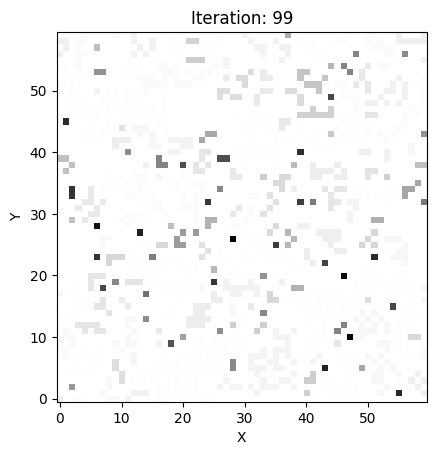

In [66]:
grid_size_x = 60
grid_size_y = 60
num_particles = 1200
num_iterations = 100

# initializing grid
grid = np.full((grid_size_x, grid_size_y), None, dtype=object)
for _ in range(num_particles):
    i = np.random.randint(grid_size_x)
    j = np.random.randint(grid_size_y)
    fitness = np.random.rand()
    particle = {'fitness': fitness}
    grid[i, j] = particle

# figure & axis for plot
fig, ax = plt.subplots()

fitness_grid = np.zeros((grid_size_x, grid_size_y))

# plot iterations
def update_plot(iteration):
    global grid
    grid = migrate_species(grid)

    for i in range(grid_size_x):
        for j in range(grid_size_y):
            if grid[i, j] is not None:
                fitness_grid[i, j] = grid[i, j]['fitness']

    # Clear the axis before each plot
    ax.clear()

    # Plot the grid state
    im = ax.imshow(fitness_grid, cmap='Greys', vmin=0, vmax=1, origin='lower')

    ax.set_title(f"Iteration: {iteration}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")


def animate(frame):
    current_iteration = frame % num_iterations
    update_plot(current_iteration)
    return ax

animation = FuncAnimation(fig, animate, frames=num_iterations, interval=1000, repeat=False)
animation.save("mirgration.gif",writer='pillow', fps=10)
# plt.colorbar(label="Fitness")
plt.show()
